# An automatic code to plot COSMO-CLM outputs
### The netcd file should contain the rotated grid information (rlat, rlon)

### Written by Bijan Fallah (@bijan_berlin)
### For feedbacks and questions contact me at  https://www.linkedin.com/in/bijanfallah/
### ......................................................................................................................................

In [1]:
#dir_target = input("\033[0;30;43m Enter the path to the data please (with / at the end)!")
#'/daten/cady/EC_Arctic_LGM/'
#file_name = input("\033[0;30;43m Enter the name of the netcdf file please!")
#'domain2016060108108.nc'
file_name = 'domain2016060108108.nc'
dir_target = './'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature
import matplotlib.patches as patches
from netCDF4 import Dataset as NetCDFFile
import re
import os

# Read the netcdf data below:

In [3]:
file_name = dir_target +file_name
nc = NetCDFFile(file_name)
lats = nc.variables['lat'][:]
lons = nc.variables['lon'][:]
rlat = nc.variables['rlat'][:]
rlon = nc.variables['rlon'][:]

# Print variables' name

In [4]:
dimension_names = []
for name, dimension in nc.dimensions.items():
    dimension_names.append(str(name))
    #print(str(name), dimension.size)

#print('-------------- Now  the Variables-----------')    
var_names = []
for name, dimension in nc.variables.items():
    var_names.append(str(name))
    #print(str(name), dimension.shape)


In [5]:
# for testing first 
##TODO : to be automated soon 
print("\033[0;30;47m Here the list of variables within the netcdf file: \n")
print(var_names)
#var = raw_input("\033[0;30;43m Enter your variable name to be plotted:\n") 
var = 'SOILTYP'
zdim = 0
t = nc.variables[var][:,:].squeeze()
#nc.close()

 Here the list of variables within the netcdf file: 

['time', 'mlev', 'rlon', 'rlat', 'FR_LAND', 'ICE', 'PLCOV_MN', 'PLCOV_MX', 'LAI_MN', 'LAI_MX', 'Z0', 'EMIS_RAD', 'RSMIN', 'URBAN', 'FOR_D', 'FOR_E', 'ROOTDP', 'lon', 'lat', 'NDVI_MAX', 'HSURF', 'FIS', 'SSO_STDH', 'SSO_THETA', 'SSO_GAMMA', 'SSO_SIGMA', 'T_CL', 'FR_LAKE', 'DEPTH_LK', 'SOILTYP', 'LU_CLASS_FRACTION', 'ALB_DRY', 'ALB_SAT', 'NDVI', 'NDVI_MRAT', 'AER_BC12', 'AER_DUST12', 'AER_ORG12', 'AER_SO412', 'AER_SS12', 'rotated_pole']


In [6]:
def extract_poles(name):
    '''
    function to extract the rotated poles
    
    '''
    import os
    CMD = "ncdump -h " + name + ' > text' 
    os.system(CMD)
    import re
    with open('text', 'r') as file:
         raw = file.readlines()
        
    for line in raw :
     
        if re.search(r'rotated_pole:grid_north_pole_longitude =', line):
            print('pol_lon= '+ str(line.split("= ",1)[1][:-4]))
            pol_lon = float(line.split("= ",1)[1][:-4])
        if re.search(r'rotated_pole:grid_north_pole_latitude =', line):
            print("pol_lat= "+ str(line.split("= ",1)[1][:-4]))
            pol_lat = float(line.split("= ",1)[1][:-4])
    CMD = "rm -f text" 
    os.system(CMD)

    return pol_lon, pol_lat

In [7]:
pol_lon, pol_lat = extract_poles(file_name)
if len(t.shape)>2 and t.shape[0]> 1:
    print('The variable has more than 1 level/time')
    answer = raw_input('Shall I make a mean of all (yes or no)?')
    if answer == 'yes':
        t = np.mean(t, axis=0)
    else:
        answer = raw_input('Shall I plot an specific level/time (1..'+ str(t.shape[0]) +")")
        t = t[int(answer),:,:].squeeze()   
t.shape

pol_lon= 0.
pol_lat= 6.55


(189, 172)

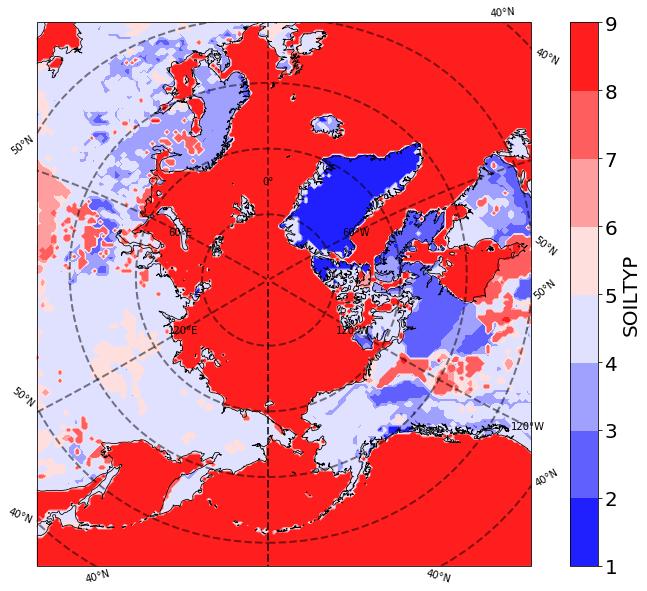

In [8]:
import matplotlib.image as image
import matplotlib.cbook as cbook
#datafile = 'rain_bijan_50.png'
#im = image.imread(datafile)
#im[:, :, -1] = 0.7  # set the alpha channel

fig = plt.figure('1')
fig.set_size_inches(14, 10)
pc = ccrs.PlateCarree()
rp = ccrs.RotatedPole(pole_longitude= pol_lon,
                      pole_latitude= pol_lat,
                      globe=ccrs.Globe(semimajor_axis=6370000,
                                       semiminor_axis=6370000))
ax = plt.axes(projection=rp)
#ax.imshow(im, aspect='auto',extent=(-50., 50., .1, .1), zorder=2)

ax.coastlines('50m', linewidth=0.8)
ax.add_feature(cartopy.feature.OCEAN,
               edgecolor='black', zorder=0,
               linewidth=0.8, alpha=.7)
ax.add_feature(cartopy.feature.LAND, zorder=0,
               linewidth=0.8, alpha=.7)
v = np.linspace(np.nanmin(t),np.nanmax(t) , 21, endpoint=True)
rlons, rlats = np.meshgrid(rlon, rlat)
cs = plt.contourf(rlons, rlats, t, cmap=plt.cm.bwr, zorder=1) 
#cs = plt.contourf(lons, lats, t, v, transform=ccrs.PlateCarree(), cmap=plt.cm.BuGn)        
cb = plt.colorbar(cs)
cb.set_label(var, fontsize=20)
cb.ax.tick_params(labelsize=20)

#plt.scatter(lons[idx], lats[idx], marker='.', transform=ccrs.PlateCarree(), c='gray', s=10, zorder=10)
          #  plt.scatter(LO[points_in_indx], LA[points_in_indx], marker='.', transform=ccrs.PlateCarree(), c='red', s=20, zorder=10)
ax.gridlines( draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='--')

#fig.figimage(im,20,30, zorder=15)
#plt.text(0.005, 0.01,'@bijan_berlin', ha='left', va='bottom', transform=ax.transAxes)
#plt.show()

In [9]:
#plt.close()


In [10]:
t.shape


(189, 172)

# saving the plot as pdf 

In [11]:
os.system('mkdir plots')
#os.system('cd plots')
name = "./plots/" + var + '.pdf'
plt.savefig(name,bbox_inches='tight')
plt.close()
os.system('cd ../')

0

In [12]:
print("\033[0;30;47m Thanks a lot for using this code \n")
print("\033[0;30;47m Please follow and give feedback : https://www.linkedin.com/in/bijanfallah/ \n")


 Thanks a lot for using this code 

 Please follow and give feedback : https://www.linkedin.com/in/bijanfallah/ 



In [13]:
plt.close()